<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/jsonload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import json

with open('/content/drive/My Drive/Colab Notebooks/study.json') 
as f :

    jsndata = json.load(f)

print(jsndata)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
with open('/content/drive/My Drive/Colab Notebooks/study.json') as f :
    jsndata = json.load(f)
print(jsndata)

{' 名前 ': ' たろう ', ' 年齢 ': 17, ' 履修科目 ': {' 修得済 ': {' 国語 ': [' 国語総合 '], ' 数学 ': [' 数学1 ', ' 数学A '], ' 情報 ': [' 情報1 ']}, ' 未修得 ': {' 情報 ': [' 情報2 ']}}}


In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.mext.go.jp/b_menu/news/index.html'
r = requests.get(url)
soup = BeautifulSoup( r.content, 'html.parser')
links = soup.find_all('ul', 'news_list')
for l in links:
    titles = l.find_all('a')
    for t in titles:
        print( t.string )

令和2年度「英知を結集した原子力科学技術・人材育成推進事業」における新規採択課題の公募開始に関するお知らせ ～国際協力型廃炉研究プログラム（日英原子力共同研究）～
第62次南極地域観測隊員の決定等について
文部科学広報2020年6月号
「人を対象とする生命科学・医学系研究に関する倫理指針（案）概要」に関するパブリックコメント（意見公募手続）の実施について
国立研究開発法人審議会 量子科学技術研究開発機構部会（第18回）の開催について
ライフサイエンス委員会（第96回）の開催について
学校における携帯電話の取扱い等に関する有識者会議（令和2年度）（第1回）　議事要旨
学校における携帯電話の取扱い等に関する有識者会議の設置について
大学改革推進等補助金「大学保有検査機器活用促進事業」の公募について（第1次）
萩生田光一文部科学大臣記者会見録（令和2年6月26日）
質保証システム部会（第1回）の開催について
クロスアポイントメント制度の基本的枠組と留意点【追補版】
全国的な学力調査のCBT化検討ワーキンググループ（第2回）配付資料
全国的な学力調査のCBT化検討ワーキンググループ（第2回）議事要旨
HPCI計画推進委員会（第43回）の開催について
「大学教育のデジタライゼーション・イニシアティブ（Scheem-D）～ With コロナ/ After コロナ時代の大学教育の創造～」の実施について
令和2年度「日本型教育の海外展開推進事業（EDU-Portニッポン）」パイロット事業及び調査研究事業の選定結果について
令和2年度大学教育再生戦略推進費「大学の世界展開力強化事業」 ～アフリカ諸国との大学間交流形成支援～申請期限再延長について（通知）
日本語教育の推進に関する施策を総合的かつ効果的に推進するための基本的な方針の閣議決定について
新しい時代の特別支援教育の在り方に関する有識者会議（第8回）の開催について【WEB会議】
大学入学者選抜改革について
次世代学術情報ネットワーク・データ基盤整備作業部会（第3回）の開催について【オンライン会議】
教育課程部会（第117回）の開催について
科学技術･学術審議会学術分科会研究費部会（第10期第11回）の開催について
萩生田光一文部科学大臣記者会見録（令和2年6月23日）
量子科学技術委員会　量子ビーム利用推進小委員会（第9期～）（

In [ ]:
# https://qiita.com/tackey/items/5b7b2be23af60335fe11
# 日本語入ってたらエラーが出ますね
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/population.csv",encoding='cp932')
df['増減'] = (df['出生数'] + df['転入者数']) - (df['死亡数'] + df['転出者数'])
df['増減率'] = df['増減'] / df['総人口'] * 100
df.sort_values('増減率', ascending = False).head(5)

,都道府県,総人口,出生数,死亡数,転入者数,転出者数,増減,増減率
12,東京都,13515271,113194,111673,456635,372404,85752,0.634482
46,沖縄県,1433566,16941,11326,26384,26476,5523,0.385263
13,神奈川県,9126214,73475,75762,225815,208539,14989,0.164241
22,愛知県,7483128,65615,64060,127036,116518,12073,0.161336
10,埼玉県,7266534,56077,62565,180451,162374,11589,0.159485


In [ ]:
df['増減'].sum()

-283642

In [ ]:
melted = df.melt( ['都道府県'] , var_name = '属性', value_name = '値')

In [ ]:
melted2 = df.melt(['都道府県'], ['総人口', '増減', '増減率'],
    var_name = '属性', value_name = '値')
melted2.head(5)

,都道府県,属性,値
0,北海道,総人口,5381733.0
1,青森県,総人口,1308265.0
2,岩手県,総人口,1279594.0
3,宮城県,総人口,2333899.0
4,秋田県,総人口,1023119.0


In [ ]:
# logformat -> wideformat
table = melted.pivot_table( values='値', index = '都道府県', columns='属性')
table.reset_index(inplace =True)
table.head(3)

属性,都道府県,出生数,増減,増減率,死亡数,総人口,転入者数,転出者数
0,三重県,13950.0,-10765.0,-0.592830,20139.0,1815865.0,30612.0,35188.0
1,京都府,19662.0,-6471.0,-0.247898,25495.0,2610353.0,58586.0,59224.0
2,佐賀県,7064.0,-5360.0,-0.643587,9702.0,832832.0,15900.0,18622.0


In [ ]:
import numpy as np
table2 = melted.pivot_table(values='値', index='都道府県', columns='属性', aggfunc=np.sum)
table2.head(3)

属性,出生数,増減,増減率,死亡数,総人口,転入者数,転出者数
都道府県,,,,,,,
三重県,13950.0,-10765.0,-0.592830,20139.0,1815865.0,30612.0,35188.0
京都府,19662.0,-6471.0,-0.247898,25495.0,2610353.0,58586.0,59224.0
佐賀県,7064.0,-5360.0,-0.643587,9702.0,832832.0,15900.0,18622.0


# 欠損値と異常値の取り扱い

In [ ]:
# そらまめ君のデータ http://soramame.taiki.go.jp/DownLoad.php
# encording = cp932
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kesson/201912_13_13101010.csv", encoding='cp932')
df.isnull().sum()

測定局コード            0
日付                0
時                 0
SO2(ppm)         12
NO(ppm)          12
NO2(ppm)         12
NOx(ppm)         12
CO(ppm)         744
Ox(ppm)          13
NMHC(ppmC)      744
CH4(ppmC)       744
THC(ppmC)       744
SPM(mg/m3)        5
PM2.5(ug/m3)      4
SP(mg/m3)       744
WD(16Dir)         1
WS(m/s)           1
TEMP(℃)           1
HUM(％)            1
dtype: int64

In [ ]:
# すべての列にデータがあるものを使う：df1 = df.dropna()
# 必要な列を選び、欠損値がある行を除く:
# df2 = df[['日付', '時', 'N0x(ppm)']].dropna()
# 欠損値を0として扱う : df3 = df.fillna(0)
# 前の値で埋める: df4 = df.fillna(method='ffill')
# 平均値で埋める: df5 = df.fillna(df.mean())


#外れ値は、四分位範囲の統計量を用いたり、
#データ間の距離を用いたり、学習16のクラスタリングを用いたりする。


# 重回帰分析

## 重回帰モデルの適合度

### 寄与率(決定係数) $\ R^{2}$

$\ R^{2} = \frac{S_{R}}{S_{T}} = 1 - \frac{S_{E}}{S_{T}}$

全変動(全平方和) : $\ S_{T} = \sum_{i=1}^{n}(y_{i}-\bar{y})^2$

残差変動(残差平方和): $\ S_{E} = \sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^2$

寄与率は、100％に近いほどモデルがデータに適合していることになる。

説明変数の個数 **p** 個<br>
データ数 **n** 個

# 主成分分析
## 新しい特徴量を効果的に作成する方法

・変数の間の共分散や相関の強い変数同士をまとめて、個々の対象の違いを最も大きくするような主成分と呼ばれる新しい特徴量（変数）を作成。

・主成分分析で作成する主成分とは、分散が最大となるように決定されるように1つの変数



# 分類

## 決定木による2値分類

In [ ]:
import pandas as pd
titanic = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kesson/train.csv')
titanic = titanic[["Pclass","Sex","Age","Survived"]] # 2重括弧ね
titanic = titanic.dropna()
titanic.head(5)

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
# 決定木の可視化
# graphvizがあるらしいい

import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# ラベルエンコーダー
titanic["Sex"] = le.fit_transform(titanic["Sex"])

target = titanic["Survived"]
data = titanic[["Pclass","Sex","Age"]]
data2 = titanic[["Sex","Age"]]
titanic.head(100)

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
120,2,1,21.0,0
122,2,1,32.5,0
123,2,0,32.5,1
124,1,1,54.0,0


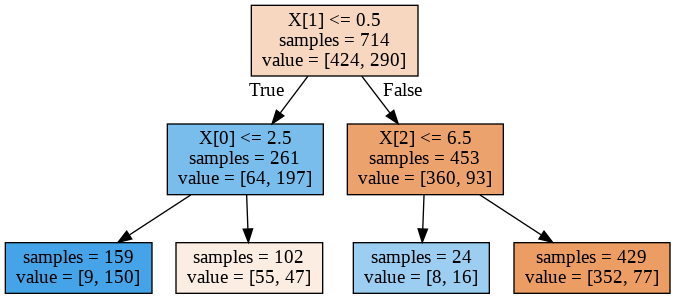

In [ ]:
DTC = DecisionTreeClassifier(max_depth=2)
DTC.fit(data, target)
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(data2,target)
export_graphviz(DTC, "tree1.1.dot",impurity=False,filled=True)
subprocess.run("dot -Tpng tree1.1.dot -o tree1.1.png".split())
export_graphviz(dt, "tree2.dot",impurity=False,filled=True)
subprocess.run("dot -Tpng tree2.dot -o tree2.png".split())
# # 画像を表示する
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# img = cv2.imread("tree1.1.png")
# plt.imshow(img)
from IPython.display import Image, display_png
display_png(Image("tree1.1.png"))
# display_png(Image("tree2.png"))

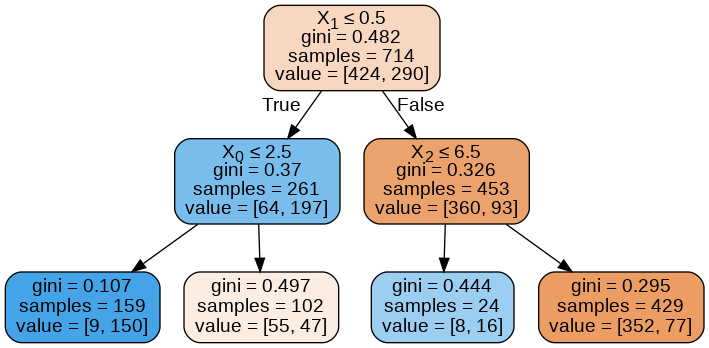

In [ ]:
from IPython.display import Image
# !pip install pydotplus
import pydotplus
dot_data = export_graphviz(DTC, out_file=None,  filled = True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(41.85, 36.23999999999998, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(292.95, 36.23999999999998, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]')]

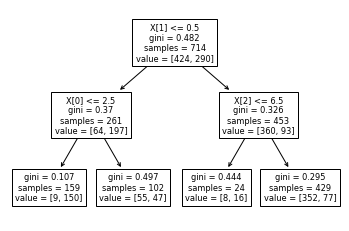

In [ ]:
from sklearn import tree
tree.plot_tree(DTC)

## k-近傍法による分類

k-nearest neighbor method, kNN
予測したい値に最も距離が近いk個を考え、その中で多数決をとり、多い値をその予測値とする考えた方である。

### MNISTをk-近傍法を用いて学習

In [ ]:
import pandas as pd
mnist = pd.read_csv("/content/drive/My Drive/Colab Notebooks/kNN/train.csv")
import numpy as np

# データフレームに変換しましょう
# labelとpixelがある

mnist_train = mnist[:1000]
mnist_train=np.reshape(mnist_train,(1000,785))
mnist_train_target = pd.DataFrame(mnist_train, columns=['label'])
# pandas.DataFrameの行・列を指定して削除するdrop
# 引数labelsとaxisで指定する。列の場合はaxis=1。
# https://note.nkmk.me/python-pandas-drop/
mnist_train_data = mnist_train.drop('label',axis=1)

mnist_test = mnist[1000:1100]
mnist_test=np.reshape(mnist_test,(100,785))
# DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
#  import sys
# のエラーを防ぐ
mnist_test_target = pd.DataFrame(mnist_test, columns=['label'])
mnist_test_data = mnist_test.drop('label',axis=1)

# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('whitegrid')

# %matplotlib inline

# sns.pairplot(mnist_train,hue = 'label',size = 2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#https://qiita.com/yshi12/items/26771139672d40a0be32
#from sklearn.cross_validation import train_test_split#使えません
#https://qiita.com/tprn/items/3acef9484a25de96576a
#from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 3) #k = 3
knn.fit(mnist_train_data,mnist_train_target.values.ravel())
pred = knn.predict(mnist_test_data)
# https://qiita.com/yshi12/items/26771139672d40a0be32
from sklearn import metrics
metrics.accuracy_score(mnist_test_target,pred)

0.89

### kの数で精度が変わるなら、、回してみよう

max_n_neighbors: 3
max_score: 0.89


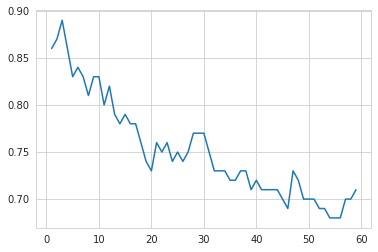

In [ ]:
accuracy = []
k_range = 60
min_s = -1
max_k = -1
for k in range(1,k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(mnist_train_data, mnist_train_target.values.ravel())
    pred = knn.predict(mnist_test_data)
    score = metrics.accuracy_score(mnist_test_target.values.ravel(), pred)
    accuracy.append(score)
    if score > min_s:
        max_k = k
        min_s = score
plt.plot(range(1,k_range),accuracy)

print('max_n_neighbors:',max_k)
print('max_score:',min_s)


## クラスタリング

似ているデータをまとめて、いくつかのクラスタと言われるグループに分割する手段

### 階層的クラスタリング
1つ1つのデータを1つのクラスタとし、距離が最も近いクラスタ同士を併合して、階層的にクラスタを形成する方法

クラスタリングの過程において、併合の様子を木として図示したものをデンドログラム（樹形図）

距離が近い2つをまとめて→くりかえして、1つのクラスタにする。

デンドログラム、縦軸はクラスタ間の距離。
デンドログラムと水平線の交点の数がクラスタ数になる。

In [ ]:
# 行と列を入れ替える Excel https://support.microsoft.com/ja-jp/office/%E8%A1%8C%E3%81%8B%E3%82%89%E5%88%97%E3%80%81%E3%81%BE%E3%81%9F%E3%81%AF%E5%88%97%E3%81%8B%E3%82%89%E8%A1%8C%E3%81%AB%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%85%A5%E3%82%8C%E6%9B%BF%E3%81%88%E3%82%8B-%E9%85%8D%E7%BD%AE%E3%81%AE%E8%BB%A2%E6%8F%9B-3419f2e3-beab-4318-aae5-d0f862209744
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/clustering/train.csv", index_col = 0,encoding='cp932')
df.head()

,通信,旅行関係,教育、教養娯楽,衣類等,医療,家具等,家電等,住宅関係,自動車等関係,冠婚葬祭費用,仕送り金
北海道,16806,948,14345,763,1945,1751,4138,2592,22796,515,2376
東北,17387,123,24406,672,1360,429,4001,3214,33769,5270,3255
関東,18561,744,40566,929,1658,1315,5136,10534,21101,3595,1685
北陸,18308,408,20279,2085,2982,1401,7211,4310,49414,1883,2839
東海,18757,165,27067,1594,2013,1185,4777,10958,34241,7660,2506


自動車費用は他の分類の差よりも大きな値になっている..?<br>
教育、教養娯楽もそうだね...?<br>
データの基準化を行いましょう

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df)
df_std = pd.DataFrame( data = sc.transform(df), index = df.index, columns = df.columns)

In [ ]:
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v300.json

In [ ]:
pip install japanize-matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


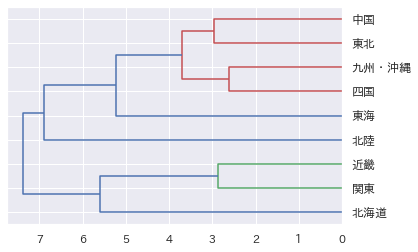

In [ ]:
# 基準化した値を用いて、クラスタリングを行う
import matplotlib.pyplot as plt
# https://tecurio.com/googlecolab_matplotlib_japanize/
# https://teratail.com/questions/252945
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage( df_std, method = 'ward', metric = 'euclidean')
den = dendrogram(z, labels = df.index, orientation = 'left', distance_sort='decending')
# 日本語が表示されないので、 , fontname="MS Gothic" を追加する



### k-means法
・あらかじめ分割するクラスタ数を決めておき、ランダムに代表点(セントロイド)を決める

・データと各代表点の距離を求め、最も近い代表点のクラスタに分類

・クラスタごとの平均を求め、新しい代表点とする

・代表点の位置が変わっていたら2に戻る。変化が無ければ終わり


#### k-means++法
 最初を、データの中からランダムに1つの代表点を選び、その点からの距離の2乗に比例した確率で残りの代表点を選ぶ。

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/clustering/Wholesale_customers_data.csv")

In [ ]:
sub_cols = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 33 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,354 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-g

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'クラスタ内誤差の平方和 SSE')

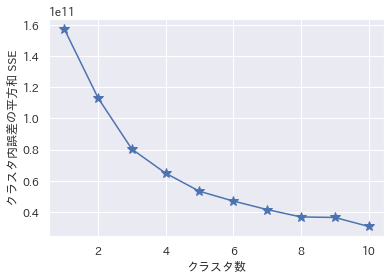

In [ ]:
# clustering
# elbor法
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v300.json
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定
dist_list = []
for i in range(1,11):
    kmeans = KMeans(init = 'random', n_clusters = i, random_state = 0)
    y_km = kmeans.fit(sub_cols)
    dist_list.append(kmeans.inertia_)
plt.plot(range(1,11), dist_list, marker='*', markersize=10)
plt.xlabel('クラスタ数')
plt.ylabel('クラスタ内誤差の平方和 SSE')

In [ ]:
# k-means法によりクラスタリング
kmeans = KMeans(init = 'random', n_clusters = 5, random_state =0)
pred = kmeans.fit_predict(sub_cols)
df['cluster_id'] = pred

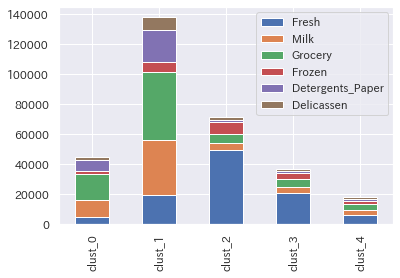

In [ ]:
# クラスタリングしたデータの特徴を、属性ごとに平均値を求める
clusterinfo = pd.DataFrame()
for i in range(5):
    clusterinfo['clust_' + str(i)] = df[df['cluster_id']==i].mean()
clusterinfo = clusterinfo.drop(['Channel', 'Region', 'cluster_id'])
clusterinfo.T.plot.bar(stacked = True)

Text(0, 0.5, 'データ数')

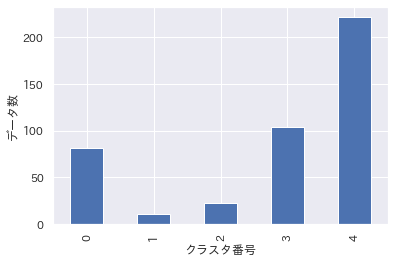

In [ ]:
# また、各クラスタに含まれるデータ数を調べる
labels = pd.Series(kmeans.labels_, name='cluster_number')
ax = labels.value_counts(sort=False).plot(kind = 'bar')
ax.set_xlabel('クラスタ番号')
ax.set_ylabel('データ数')

## アソシエーション分析

履歴データなどを用いて、データの結びつきの強さを求める分析をアソシエーション分析

事例「おむつを買った人は缶ビールを買う傾向にある」

一人の客による1回の購入データをマーケットバスケットデータといい、これを基に分析するマスケットバスケット分析を取り上げる

評価指標は3つ

**支持度**<br>
全ての商品を買った人のうち、特定の商品を買った人の割合

supp(コーヒーとパン) = 3/8 = 0.375

supp(お茶とパン) = 1/8 = 0.125


**確信度**<br>
商品Xを買った人のうち、標品Xも商品Yも両方とも買った人の割合

conf(コーヒー -> パン) = 3/4 = 0.75<br>
conf(パン -> コーヒー) = 3/5 = 0.6<br>
conf(コーヒー -> 弁当) = 3/4 = 0.75<br>


**リフト値**<br>
X -> Y の確信度を商品Yの支持度で割った値

lift(コーヒー -> パン) = conf(コーヒー -> パン) / supp(パン) = 1.2<br>
lift(コーヒー -> 弁当) = conf(コーヒー -> 弁当) / supp(弁当) = 0.857


コーヒーを買う人に勧めることが適切なのはパンである

リフト値は膨大な種類があるので、一定の基準以上の支持度や確信度の場合だけで計算する工夫が必要

それをアプリオリアルゴリズムという

# ニューラルネットワーク

In [1]:
import numpy as np
X = np.array([0.3, 0.8, 1.2, 0.7])
W = np.array([1,2,1,1])
B = 0.2
A = np.dot(X,W) + B
print(A)

4.0


## 活性化関数

各ニューロンの結果の正確さを確率で表したものである

ステップ関数 0,1

シグモイド関数 ネコか犬か

ソフトマックス関数 ネコか犬か鳥か　複数分類




## 損失関数

ニューラルネットワークの性能の良し悪し

予測データと教師データとの誤差、0に近い程よい


## 勾配降下法

最適な重みやバイアスを探す方法


### 誤差逆伝播法

出力結果の誤差を次の重み付けとバイアスを決める計算に利用

# 過学習

学習の時に特定のデータにだけ過剰に田泓氏、学習に用いていない他のデータでは正しくならない状態のことである

In [ ]:
# MNIST（4 と 9 の手書き文字）の認識（2 値分類）をニューラルネットワークで学習
# Neural Network Console（https://dl.sony.com/ja/